# Numerical Stability of Gram–Schmidt Orthogonalization

This notebook compares classical Gram–Schmidt (CGS) and modified Gram–Schmidt (MGS)
on correlated Gaussian vectors. We examine pairwise angle histograms and the 
distribution of off-diagonal entries in QᵀQ to quantify loss of orthogonality.


In [2]:
# import packages 

import numpy as np
import matplotlib.pyplot as plt    

In [3]:
# set seed and build a set of correlated Gaussian vectors
np.random.seed(112025) # don't change this line

dim = 500 # dimension of the vectors
n_sample = 500 # number of vectors 

W = np.random.randn(dim, n_sample)

A = np.eye(dim) # dim x dim identity matrix
A = (2*A + np.eye(dim, k=-1) + np.eye(dim, k=-2) + np.eye(dim, k=1) + np.eye(dim, k=2)) # add 1's on the super- and sub-diagonals

X = A @W # correlated Gaussian vectors

# X = A @ A @ W # uncomment this line to increase the correlation between the vectors
# X = A @ A @ A @ W # uncomment this line to further increase the correlation between the vectors

In [4]:
np.random.seed(112025)
dim = 500
n_sample = 500
W = np.random.randn(dim, n_sample)
A = (2*np.eye(dim)
     + np.eye(dim, k=-1) + np.eye(dim, k=-2)
     + np.eye(dim, k= 1) + np.eye(dim, k= 2))
X  = A @ W
# X2 is a more strongly correlated dataset (A^2 @ W) to stress the algorithms
X2 = A @ A @ W


In [5]:
# implement the standard Gram Schmidt algorithm 

# def gram_schmidt(X):
    # input matrix X whose columns are the vectors to be made orthonormal 
    # output matrix Q whose columns are the orthonormal basis for the span of the columns of X

    # return Q


In [6]:
def gram_schmidt(X):
    """
    Input:  X (d x n) with columns v_j
    Output: Q (d x n) with orthonormal columns q_j spanning {v_j}
    """
    d, n = X.shape
    Q = np.zeros((d, n), dtype=float)
    for j in range(n):
        v = X[:, j].astype(float).copy()
        if j > 0:
            r = Q[:, :j].T @ v          # [r_1j, ..., r_(j-1)j]
            v = v - Q[:, :j] @ r        # v - sum_k r_kj q_k
        norm = np.linalg.norm(v)
        Q[:, j] = v / norm if norm > 0 else 0.0
    return Q


In [7]:
def modified_gram_schmidt(X):
    """
    Input:  X (d x n) with columns v_j
    Output: Q (d x n) with orthonormal columns q_j spanning {v_j}
    """
    d, n = X.shape
    Q = np.zeros((d, n), dtype=float)
    for j in range(n):
        v = X[:, j].astype(float).copy()
        for k in range(j):
            r_kj = np.dot(Q[:, k], v)
            v   -= r_kj * Q[:, k]
        norm = np.linalg.norm(v)
        Q[:, j] = v / norm if norm > 0 else 0.0
    return Q


In [8]:


def angle(u, v):
    """ compute the angle between two vectors u and v """
    cos_theta = np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))
    theta = np.arccos(cos_theta) 
    return theta

def pairwise_angles(M):
    """ compute the pairwise angles between the columns of X """
    n = M.shape[1] # number of columns 
    Theta = np.zeros((n, n)) # initialize the matrix of angles 
    for i in range(n):
        for j in range(i+1, n):
            Theta[i, j] = angle(M[:, i], M[:, j])
            Theta[j, i] = Theta[i, j] # symmetry
    return Theta

In [9]:
# plotting function for reference 

# Theta_gs = pairwise_angles(Q)
# fig, ax = plt.subplots(figsize=(8,6))
# ax.hist(Theta_gs[np.triu_indices(Theta_gs.shape[0], k=1)], bins=100, range=(0, np.pi)) # don't reduce number of bins
# ax.set_xlabel('Angle (radians)', fontsize= 16)
# ax.set_ylabel('Number of pairs of vectors', fontsize= 16)
# ax.set_title('Histogram of pairwise angles of Gram-Schmidt vectors', fontsize= 16)
# plt.show()
# #plt.savefig('pairwise_angles_histogram.png')

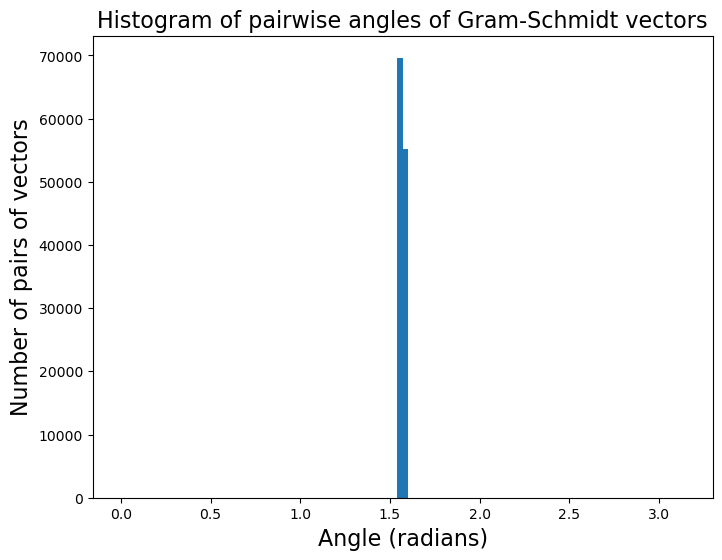

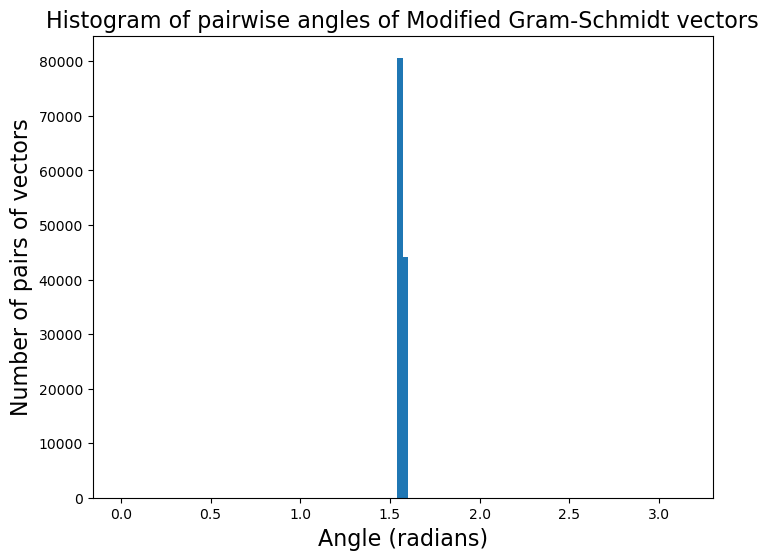

In [10]:
Q_gs  = gram_schmidt(X)
Theta_gs = pairwise_angles(Q_gs)

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(Theta_gs[np.triu_indices(Theta_gs.shape[0], k=1)], bins=100, range=(0, np.pi))  # EXACTLY your call
ax.set_xlabel('Angle (radians)', fontsize=16)
ax.set_ylabel('Number of pairs of vectors', fontsize=16)
ax.set_title('Histogram of pairwise angles of Gram-Schmidt vectors', fontsize=16)
plt.show()

Q_mgs  = modified_gram_schmidt(X)
Theta_mgs = pairwise_angles(Q_mgs)

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(Theta_mgs[np.triu_indices(Theta_mgs.shape[0], k=1)], bins=100, range=(0, np.pi))  # EXACTLY your call
ax.set_xlabel('Angle (radians)', fontsize=16)
ax.set_ylabel('Number of pairs of vectors', fontsize=16)
ax.set_title('Histogram of pairwise angles of Modified Gram-Schmidt vectors', fontsize=16)
plt.show()


In [11]:
# Now implement Modified Gram-Schmidt

# def modified_gram_schmidt(X):
    # input matrix X whose columns are the vectors to be made orthonormal 
    # output matrix Q whose columns are the orthonormal basis for the span of the columns of X

    # return Q

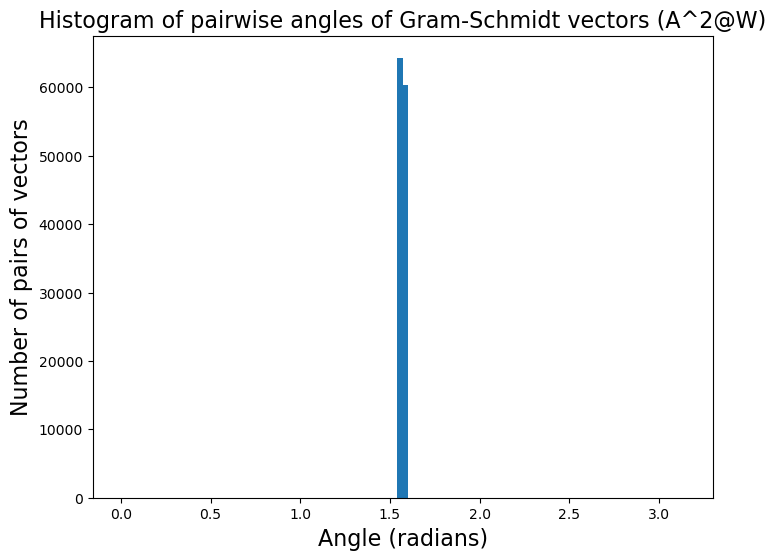

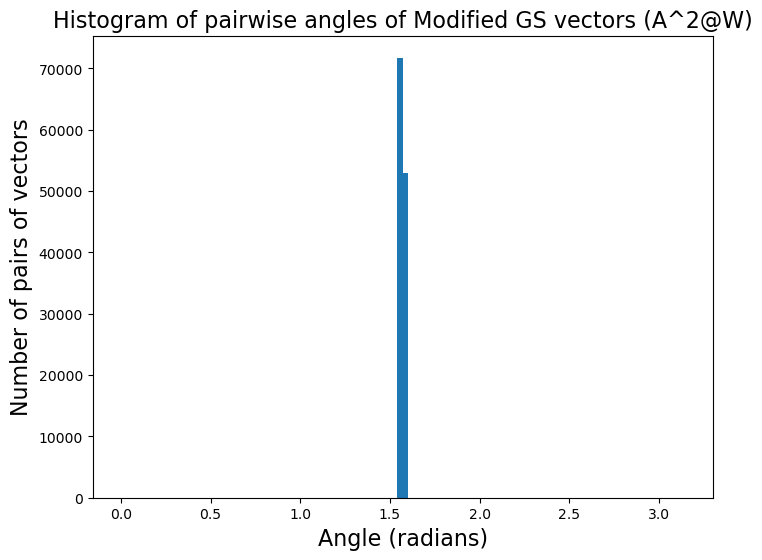

In [12]:
# X2 is a more strongly correlated dataset (A^2 @ W) to stress the algorithms
X2 = (A @ A) @ W

Q_gs2  = gram_schmidt(X2)
Theta_gs2 = pairwise_angles(Q_gs2)

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(Theta_gs2[np.triu_indices(Theta_gs2.shape[0], k=1)], bins=100, range=(0, np.pi))
ax.set_xlabel('Angle (radians)', fontsize=16)
ax.set_ylabel('Number of pairs of vectors', fontsize=16)
ax.set_title('Histogram of pairwise angles of Gram-Schmidt vectors (A^2@W)', fontsize=16)
plt.show()

Q_mgs2  = modified_gram_schmidt(X2)
Theta_mgs2 = pairwise_angles(Q_mgs2)

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(Theta_mgs2[np.triu_indices(Theta_mgs2.shape[0], k=1)], bins=100, range=(0, np.pi))
ax.set_xlabel('Angle (radians)', fontsize=16)
ax.set_ylabel('Number of pairs of vectors', fontsize=16)
ax.set_title('Histogram of pairwise angles of Modified GS vectors (A^2@W)', fontsize=16)
plt.show()


In [13]:
def hist_log_offdiag(Q, title):
    G = Q.T @ Q
    n = G.shape[0]
    off = np.abs(G[np.triu_indices(n, k=1)])
    off = off[off > 0]  # drop exact zeros
    if off.size == 0:
        print(f'[{title}] all off-diagonals are exactly zero to machine precision.')
        # draw a stem at -inf proxy
        fig, ax = plt.subplots(figsize=(8,6))
        ax.vlines(-16, 0, (n*(n-1))//2, linewidth=2)
        ax.set_xlim(-17, -15)
        ax.set_xlabel('log10(|q_i^T q_j|)', fontsize=16)
        ax.set_ylabel('Count', fontsize=16)
        ax.set_title(title, fontsize=16)
        plt.show()
        return
    z = np.log10(off)
    qlo, qhi = np.quantile(z, [0.001, 0.999])
    pad = max(1e-3, 0.1*(qhi - qlo))
    fig, ax = plt.subplots(figsize=(8,6))
    ax.hist(z, bins=100)
    ax.set_xlim(qlo - pad, qhi + pad)
    ax.set_xlabel('log10(|q_i^T q_j|)', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    ax.set_title(title, fontsize=16)
    print(f'[{title}] median log10(|off|)={np.median(z):.2f}, min={z.min():.2f}, max={z.max():.2f}')
    plt.show()


[CGS on X = A@W — log10(|off-diagonal|)] median log10(|off|)=-15.08, min=-19.09, max=-7.55


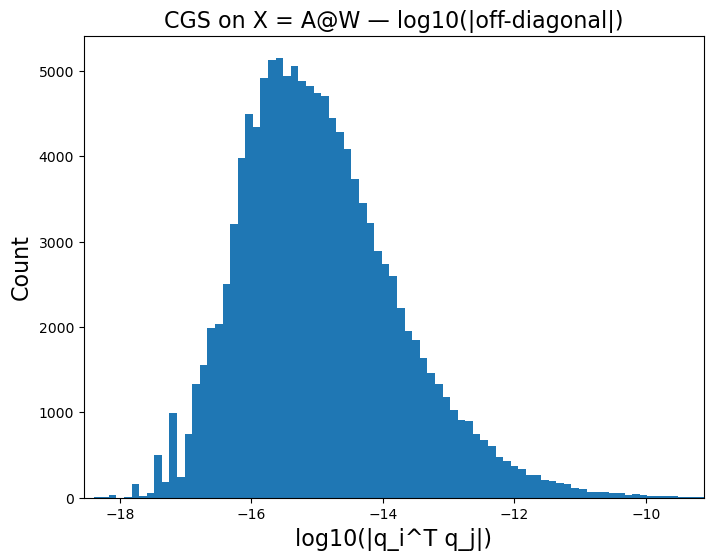

[MGS on X = A@W — log10(|off-diagonal|)] median log10(|off|)=-15.88, min=-19.09, max=-11.22


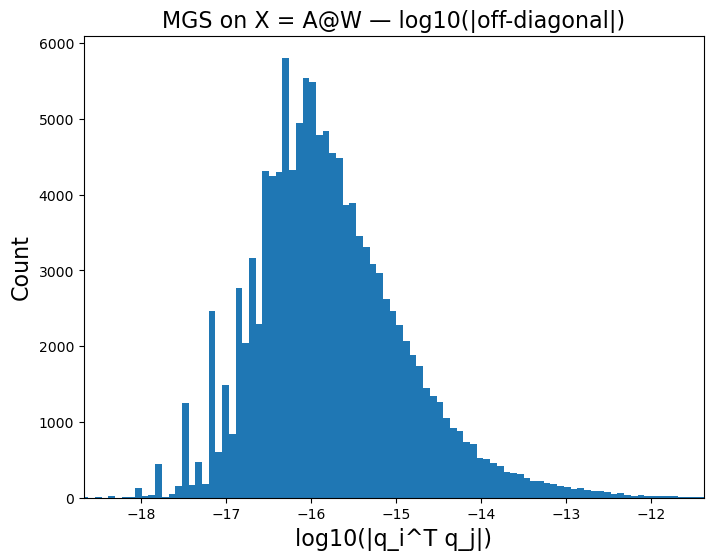

[CGS on X = A^2@W — log10(|off-diagonal|)] median log10(|off|)=-13.51, min=-18.41, max=-0.33


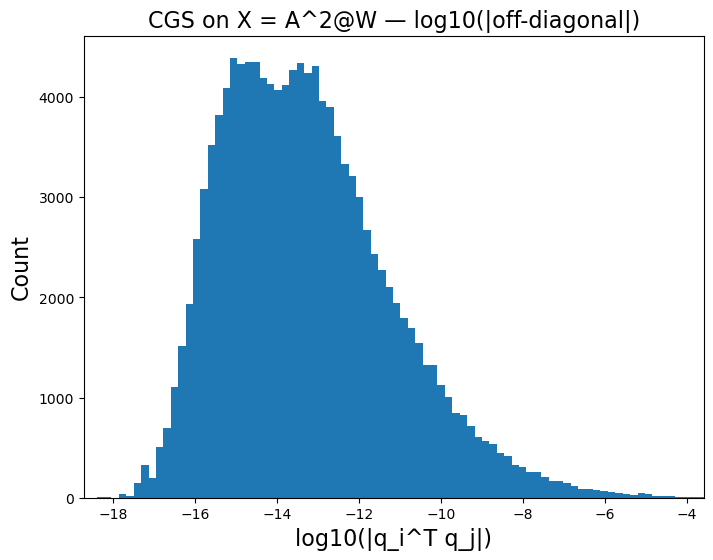

[MGS on X = A^2@W — log10(|off-diagonal|)] median log10(|off|)=-15.19, min=-18.79, max=-7.64


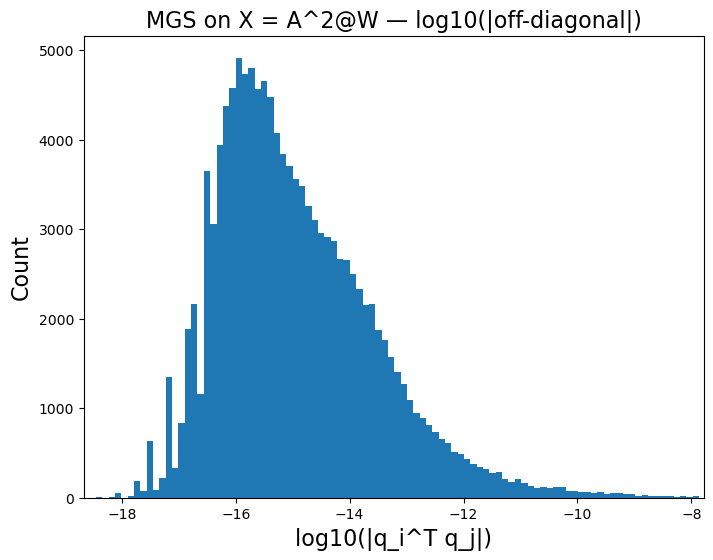

In [14]:
hist_log_offdiag(Q_gs,  'CGS on X = A@W — log10(|off-diagonal|)')
hist_log_offdiag(Q_mgs, 'MGS on X = A@W — log10(|off-diagonal|)')
hist_log_offdiag(Q_gs2, 'CGS on X = A^2@W — log10(|off-diagonal|)')
hist_log_offdiag(Q_mgs2,'MGS on X = A^2@W — log10(|off-diagonal|)')


In [15]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def _upper_tri_vals(Theta):
    i, j = np.triu_indices(Theta.shape[0], k=1)
    return Theta[i, j]

pairs = [
    (Theta_gs,   'CGS on X = A@W',   'Angles concentrate at π/2 as expected for an orthonormal basis.'),
    (Theta_mgs,  'MGS on X = A@W',   'Same behavior; MGS is designed to be more stable in finite precision.'),
    (Theta_gs2,  'CGS on X = A^2@W', 'Harder case (worse conditioning); CGS still peaks at π/2.'),
    (Theta_mgs2, 'MGS on X = A^2@W', 'Also peaks at π/2; MGS retains orthogonality well.'),
]

fig = plt.figure(figsize=(13, 10), constrained_layout=True)
gs  = GridSpec(nrows=4, ncols=2, height_ratios=[1, 0.18, 1, 0.18], figure=fig)

axes = []
txt_axes = []
# Top row plots
axes.append(fig.add_subplot(gs[0,0]))
axes.append(fig.add_subplot(gs[0,1]))
# Bottom row plots
axes.append(fig.add_subplot(gs[2,0]))
axes.append(fig.add_subplot(gs[2,1]))
# Text rows (turned off; used only to place captions)
txt_axes.append(fig.add_subplot(gs[1,0]))
txt_axes.append(fig.add_subplot(gs[1,1]))
txt_axes.append(fig.add_subplot(gs[3,0]))
txt_axes.append(fig.add_subplot(gs[3,1]))

for k, ((Theta, title, blurb), ax, tax) in enumerate(zip(pairs, axes, txt_axes)):
    vals = _upper_tri_vals(Theta)
    ax.hist(vals, bins=100, range=(0, np.pi))
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Angle (radians)', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    # caption under the panel (on a dedicated invisible axis)
    tax.axis('off')
    tax.text(0.5, 0.5, blurb, ha='center', va='center', fontsize=10)

fig.suptitle('Pairwise angle histograms (full range 0…π, 100 bins)', fontsize=16, y=1.02)
fig.savefig('grid_basic_fullrange_2x2.png', dpi=300, bbox_inches='tight')
plt.close(fig)


In [16]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def log10_offdiag(Q):
    G = Q.T @ Q
    off = np.abs(G[np.triu_indices(G.shape[0], k=1)])
    off = off[off > 0]
    return np.log10(off) if off.size else np.array([-16.0])

panels = [
    (Q_gs,   'CGS on X = A@W',
     'Off-diagonals are small but show a wider tail than MGS → more loss of orthogonality.'),
    (Q_mgs,  'MGS on X = A@W',
     'Distribution shifts left (more negative) and tightens → better numerical orthogonality.'),
    (Q_gs2,  'CGS on X = A^2@W',
     'Ill-conditioning amplifies roundoff; CGS shifts right with a heavier tail.'),
    (Q_mgs2, 'MGS on X = A^2@W',
     'Remains left-shifted with tighter spread → improved stability under stress.'),
]

# Compute global x-limits so all panels share identical scale
all_z = np.concatenate([log10_offdiag(Q) for Q,_,_ in panels])
qlo, qhi = np.quantile(all_z, [0.001, 0.999])
pad = max(1e-3, 0.1*(qhi - qlo))
xlim = (qlo - pad, qhi + pad)

fig = plt.figure(figsize=(13, 10), constrained_layout=True)
gs  = GridSpec(nrows=4, ncols=2, height_ratios=[1, 0.22, 1, 0.22], figure=fig)

axes = []
txt_axes = []
axes.append(fig.add_subplot(gs[0,0])); axes.append(fig.add_subplot(gs[0,1]))
axes.append(fig.add_subplot(gs[2,0])); axes.append(fig.add_subplot(gs[2,1]))
txt_axes.append(fig.add_subplot(gs[1,0])); txt_axes.append(fig.add_subplot(gs[1,1]))
txt_axes.append(fig.add_subplot(gs[3,0])); txt_axes.append(fig.add_subplot(gs[3,1]))

for (Q, title, blurb), ax, tax in zip(panels, axes, txt_axes):
    z = log10_offdiag(Q)
    if z.size == 1:  # all zeros case
        ax.vlines(z[0], 0, (Q.shape[1]*(Q.shape[1]-1))//2, linewidth=2)
        ax.set_xlim(z[0]-1, z[0]+1)
    else:
        ax.hist(z, bins=100)
        ax.set_xlim(*xlim)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('log10(|qᵢᵀ qⱼ|), i<j', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

    tax.axis('off')
    tax.text(0.5, 0.5, blurb, ha='center', va='center', fontsize=10)

fig.suptitle('Loss of orthogonality: log10(|off-diagonals of QᵀQ|)', fontsize=16, y=1.02)
fig.savefig('grid_diagnostics_logoff_2x2.png', dpi=300, bbox_inches='tight')
plt.close(fig)


### Summary

For moderately and strongly correlated inputs (X = A@W and X = A²@W), both CGS and MGS
produce vectors whose pairwise angles cluster near π/2, but the log₁₀(|off-diagonal|) 
histograms show that MGS keeps off-diagonal entries systematically smaller with a tighter
distribution. This matches the theoretical expectation that MGS is more stable in finite
precision, especially as the conditioning of the input basis worsens.